In [14]:
import math as m
import numpy as np
from numpy import random as r
import time
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy as cp
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

%matplotlib inline
r.seed(int(time.time()))
route = list()

In [15]:
class settings:
    iter_max = 10000
    pop_size = 100
    dimensions = 2
    c1 = 2
    c2 = 2
    neededQuality = 1000000
    objective = 0
    sigma = 0.001

In [16]:
def func(Sc):
    x1 = Sc[0]
    x2 = Sc[1]
    return m.sqrt(x1**2+x2**2)

In [17]:
def Quality(Sc,objective):
    func_output = func(Sc)
    if type(func_output) == list:
        error = [func_output[i]-objective[i] for i in range(len(func_output))]
    else:
        error = func_output - objective
    return 1/abs(error)

In [18]:
def tweak(St,twprob,sigma,high,low):
    for i in range(len(St)):
        if twprob > r.random():
            while True:
                n = r.normal(loc=0, scale=sigma)
                if (high > St[i]+n) and (low < St[i]+n):
                    St[i]+=n
                    break
    return np.array(St)

In [19]:
def move(p,world,best):
    v = p.v + world.c1 * r.random() * (p.best - p.params) \
                + world.c2 * r.random() * (best.params - p.params)
    
    return v

In [20]:
def simulatedAnnealing(high,low,t,twprob,world):
    route = list()
    #initialize the particles
    particles = []
    for i in range(world.pop_size):
        p = Particle()
        p.params = np.array([r.uniform(-100,100) for i in range(world.dimensions)])
        p.fitness = 0.0
        p.v = 0.0
        particles.append(p)
    
    Best = cp.deepcopy(particles[0])
    Q = 0
    route.append(cp.deepcopy(Best.params[:]))
    for i in range(world.iter_max):
        for p in particles:
            Q = Quality(p.params,world.objective)
            try:
                prob = m.e**((Q-p.fitness)/t)
            except:
                pass
            
            if (Q > p.fitness) or (r.random() < prob):
                p.fitness = Q
                p.best = p.params
                
            if t > 0.01:
                t-= t/10
            
            if Q > Best.fitness:
                Best = cp.deepcopy(p)
                route.append(Best.params[:])
                print('////////////\n////////////\n******new Best: {}'.format(Best.params))
            
            v = move(p,world,Best)
            p.params += v
            p.params = tweak(cp.deepcopy(p.params),twprob,world.sigma,high,low)
    
        if Q > world.neededQuality:
            break
        
    return Best, route

In [21]:
class Particle:
    pass

In [22]:
#initialize the particles
world = settings()
particles = []
for i in range(world.pop_size):
    p = Particle()
    p.params = np.array([r.random() for i in range(world.dimensions)])
    p.fitness = 0.0
    p.v = 0.0
    particles.append(p)

In [23]:
world = settings()
a, path = simulatedAnnealing(high = 100,low = -100,t =100, twprob = 0.2, world = world)

////////////
////////////
******new Best: [ 8.80091737 54.31489738]
////////////
////////////
******new Best: [ 0.90003976 32.42886985]
////////////
////////////
******new Best: [-14.25252957 -12.22367071]
////////////
////////////
******new Best: [-0.21023678  1.75864441]
////////////
////////////
******new Best: [-0.21023678  1.7585004 ]
////////////
////////////
******new Best: [-0.321148   -1.30557749]
////////////
////////////
******new Best: [-1.16680824 -0.52723487]
////////////
////////////
******new Best: [-0.01933279  0.38534687]
////////////
////////////
******new Best: [0.06641201 0.0600155 ]
////////////
////////////
******new Best: [0.05225936 0.06420853]
////////////
////////////
******new Best: [-0.0381331   0.00451434]
////////////
////////////
******new Best: [-0.03334581  0.00023158]
////////////
////////////
******new Best: [-0.01656216 -0.01598667]
////////////
////////////
******new Best: [-0.01018823 -0.00708454]
////////////
////////////
******new Best: [ 0.0069

KeyboardInterrupt: 

In [11]:
a.params

array([-8.76862994e-07, -1.26566209e-06])

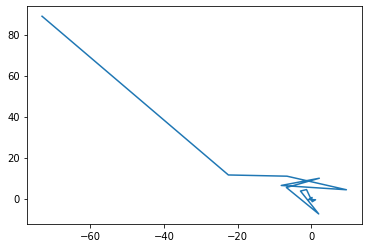

In [12]:
h1 = [i[0] for i in path]
h2 = [i[1] for i in path]
plt.plot(h1,h2)
plt.show()

In [13]:
h3 = [func(s) for s in path]
trace = go.Scatter3d(
    x=h1,  # <-- Put your data instead
    y=h2,  # <-- Put your data instead
    z=h3,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    }
)

#Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(h1, h2, h3, c=h3, cmap='Greens');
#plt.show()